#DATA PREPROCESSING

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [ ]:
#Importing dataset
df=pd.read_csv('/content/drive/MyDrive/Projects/Internship Project - Machine Downtime Analysis/Machine Downtime.csv')

## Knowing the dataset

In [ ]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [ ]:
(df.shape)

(2500, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [ ]:
#Duplicate Value Count
len(df[df.duplicated()])

0

<Axes: >

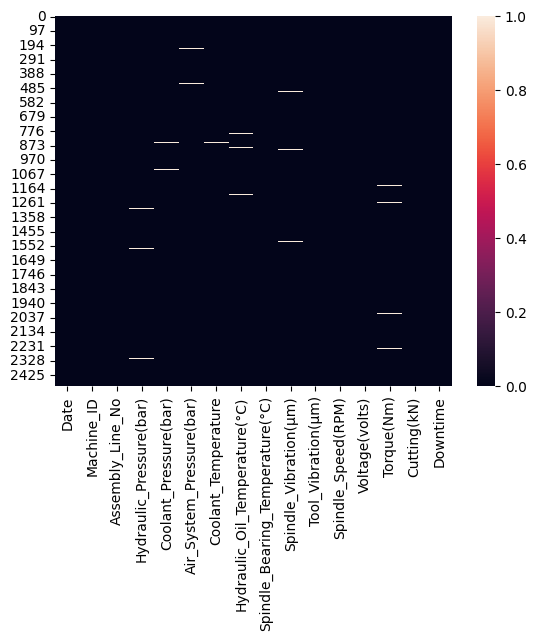

In [ ]:
#Visualizing Missing Values
# Checking Null Values by Plotting Heatmap

sns.heatmap(df.isnull(),cbar=True)

### Basic Insight

Our dataset have 2500 rows and 20 columns with no duplicates but some columns have few missing values.

In [ ]:
#Columns
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
count,2500,2500,2500,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000,2500
unique,164,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,15-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine_Failure
freq,64,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1265
mean,NaN,NaN,NaN,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551,NaN
std,NaN,NaN,NaN,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688,NaN
min,NaN,NaN,NaN,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000,NaN
25%,NaN,NaN,NaN,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000,NaN
50%,NaN,NaN,NaN,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000,NaN
75%,NaN,NaN,NaN,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000,NaN


In [ ]:
#Checking Unique Values for each variable
for i in df.columns.tolist():
 print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 164 .
No. of unique values in  Machine_ID is 3 .
No. of unique values in  Assembly_Line_No is 3 .
No. of unique values in  Hydraulic_Pressure(bar) is 1977 .
No. of unique values in  Coolant_Pressure(bar) is 1628 .
No. of unique values in  Air_System_Pressure(bar) is 2472 .
No. of unique values in  Coolant_Temperature is 275 .
No. of unique values in  Hydraulic_Oil_Temperature(°C) is 209 .
No. of unique values in  Spindle_Bearing_Temperature(°C) is 204 .
No. of unique values in  Spindle_Vibration(µm) is 1144 .
No. of unique values in  Tool_Vibration(µm) is 2350 .
No. of unique values in  Spindle_Speed(RPM) is 1180 .
No. of unique values in  Voltage(volts) is 238 .
No. of unique values in  Torque(Nm) is 1327 .
No. of unique values in  Cutting(kN) is 170 .
No. of unique values in  Downtime is 2 .


In [ ]:
#Creating a copy of dataset for cleaning purpose
df2=df.copy()

In [ ]:
#Handling Duplicates
print('The number of duplicate rows in dataset is ' + str(len(df2[df2.duplicated()]))+'.')

The number of duplicate rows in dataset is 0.


In [ ]:
# Handling Outliers

# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in df2.describe().columns:
 if abs(df2[i].mean()-df2[i].median())<0.2:
  symmetric_feature.append(i)
 else:
  non_symmetric_feature.append(i)


In [ ]:
# Getting Symmetric Distributed Features
print("Symmetric Distributed Features :-",symmetric_feature)
# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features :-",non_symmetric_feature)

Symmetric Distributed Features :- ['Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)', 'Tool_Vibration(µm)', 'Voltage(volts)', 'Cutting(kN)']
Skew Symmetric Distributed Features :- ['Hydraulic_Pressure(bar)', 'Coolant_Temperature', 'Spindle_Speed(RPM)', 'Torque(Nm)']


In [ ]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
 upper_boundary= df2[feature].mean()+3*df2[feature].std()
 lower_boundary= df2[feature].mean()-3*df2[feature].std()
 return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
 df2.loc[df2[feature]<= outlier_treatment(df=df2,feature=feature)[1], feature]=outlier_treatment(df=df2,feature=feature)[1]
 df2.loc[df2[feature]>= outlier_treatment(df=df2,feature=feature)[0], feature]=outlier_treatment(df=df2,feature=feature)[0]

In [ ]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):
 IQR= df2[feature].quantile(0.75)- df2[feature].quantile(0.25)
 lower_bridge =df2[feature].quantile(0.25)-3*IQR
 upper_bridge =df2[feature].quantile(0.25)+3*IQR
 return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
 df.loc[df[feature]<= outlier_treatment_skew(df=df2,feature=feature)[1], feature]=outlier_treatment_skew(df=df2,feature=feature)[1]
 df.loc[df[feature]>= outlier_treatment_skew(df=df2,feature=feature)[0], feature]=outlier_treatment_skew(df=df2,feature=feature)[0]

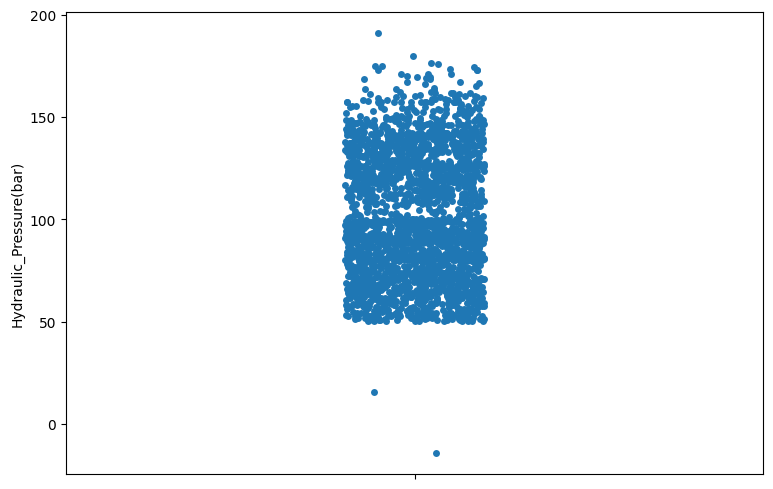

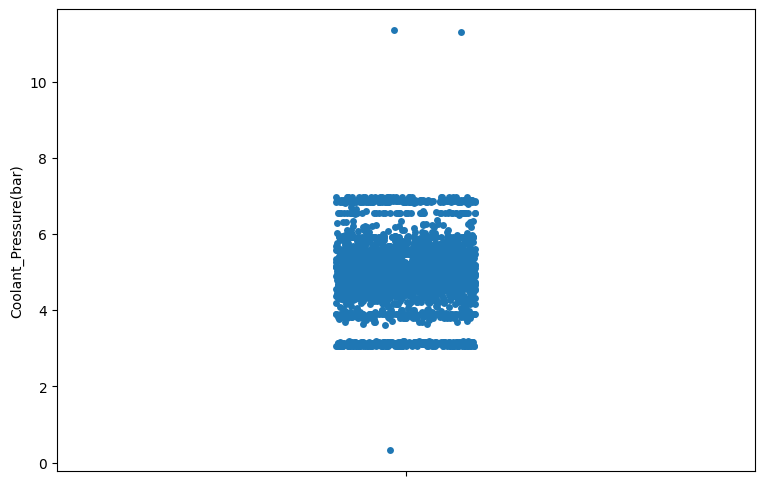

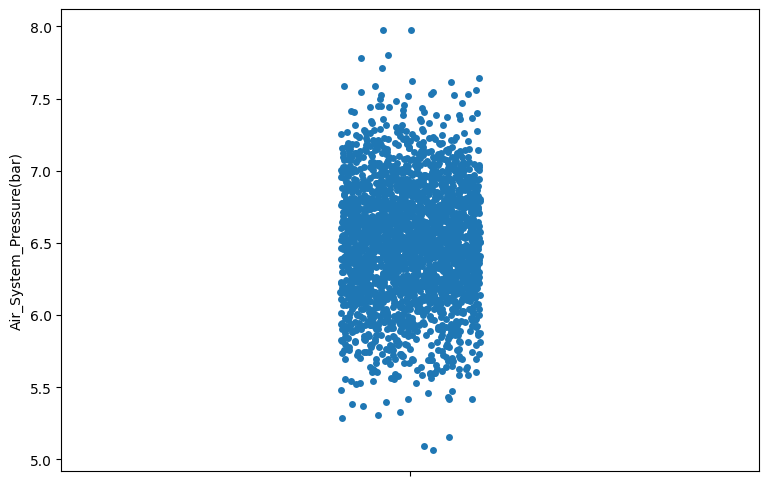

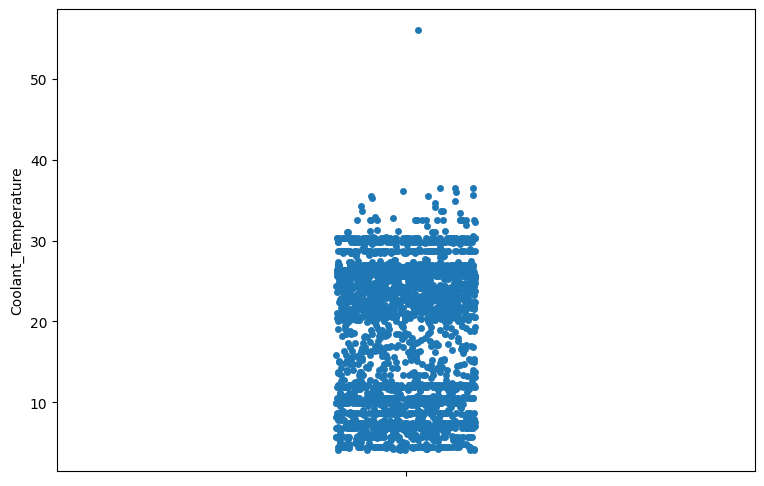

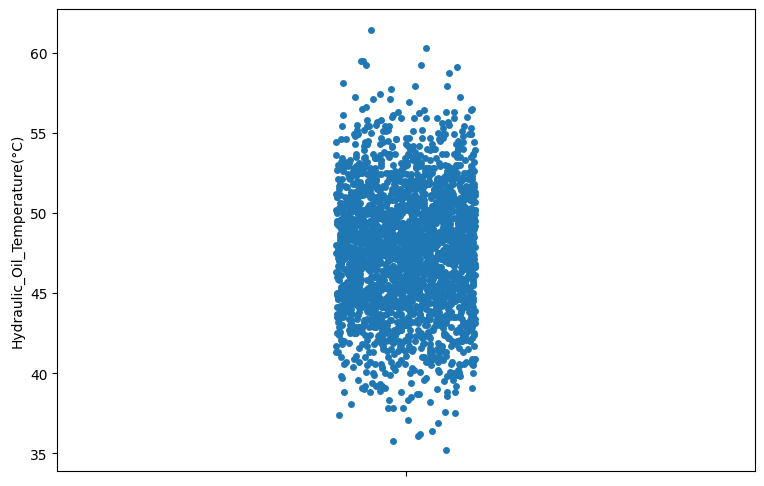

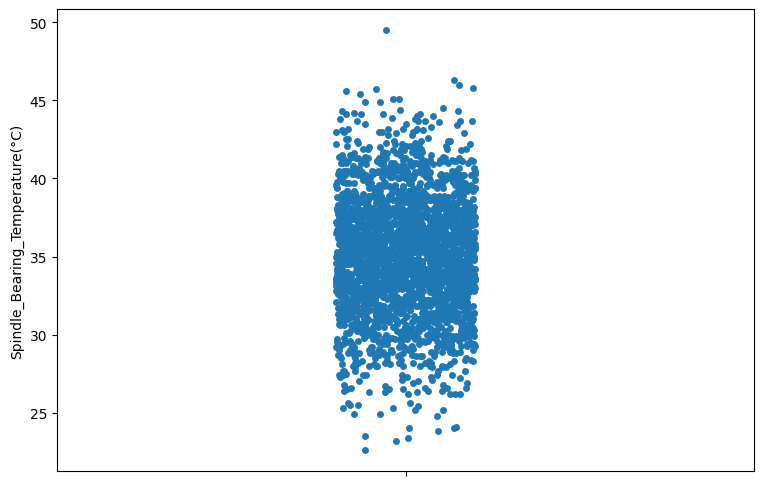

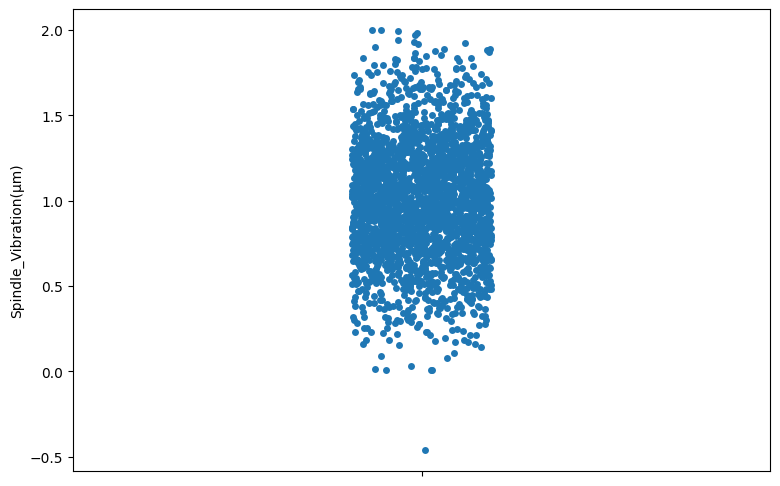

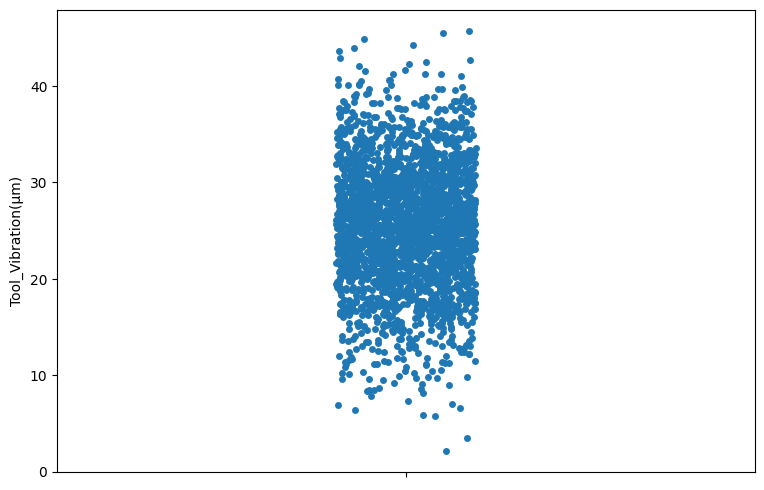

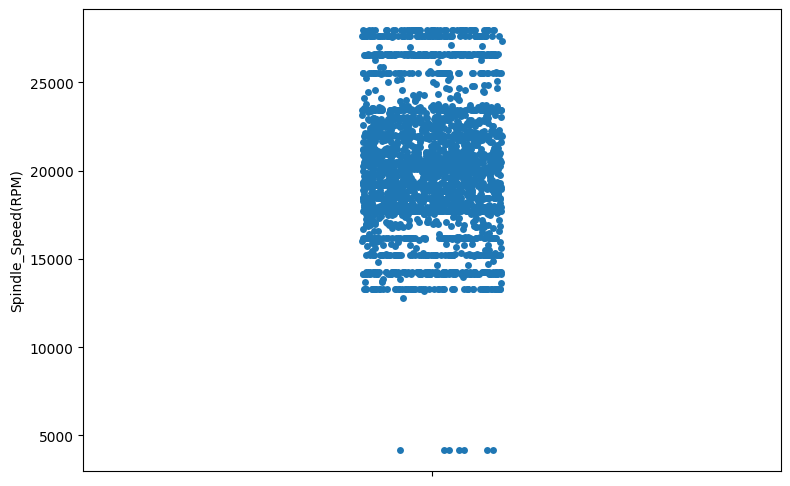

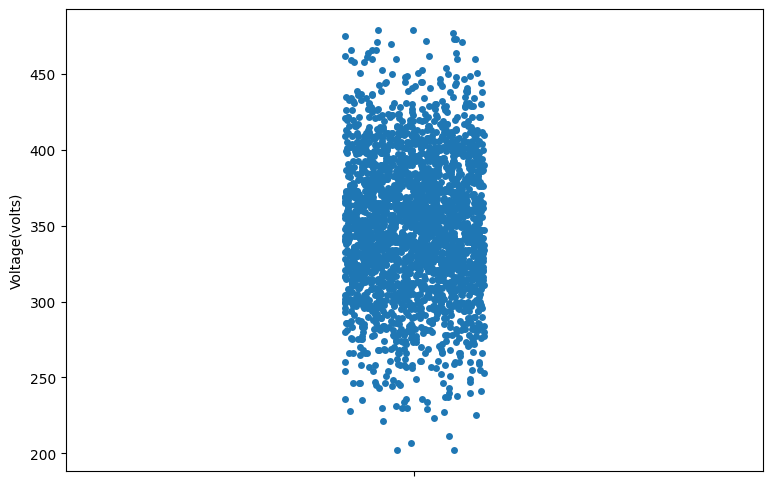

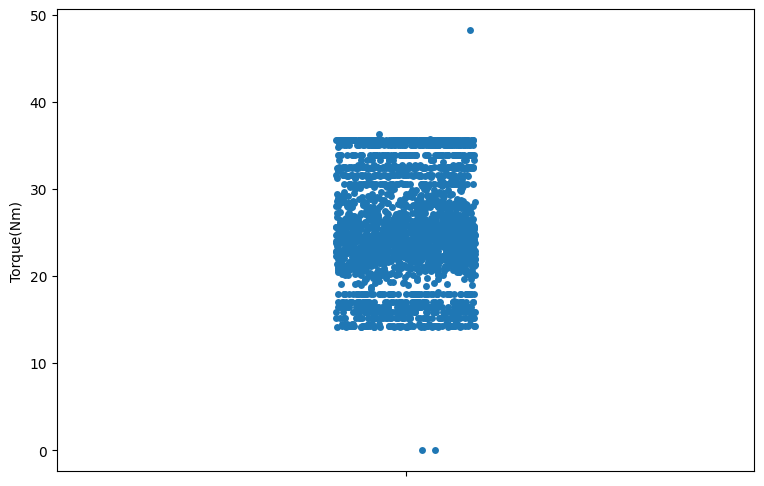

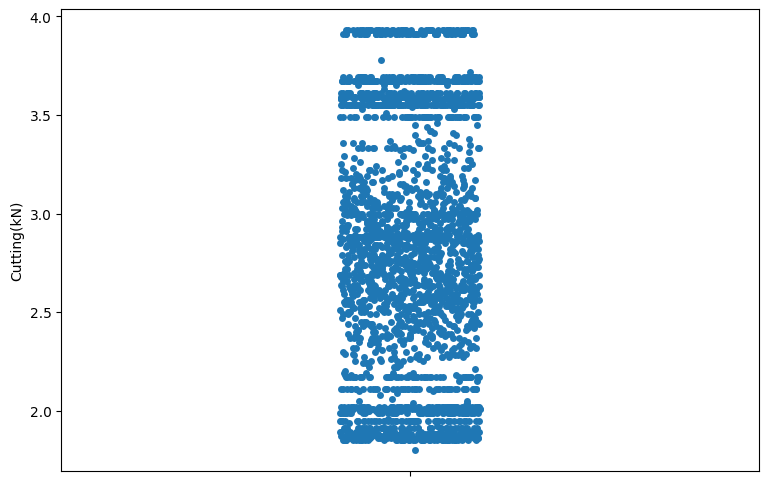

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising code for the numerical columns
for col in df2.describe().columns:
 fig=plt.figure(figsize=(9,6))
 sns.stripplot(df[col])

In [ ]:
def fill_missing(df2):
    column_means = df.mean(numeric_only=True)
    # Replace missing values (NaN) with the mean of the respective column
    df3 = df.fillna(column_means)

    return df3


In [ ]:
df3 = fill_missing (df2)

In [ ]:
# Encoding Categorical Columns

dict1={"Machine_Failure":1,"No_Machine_Failure":0}
df3['Downtime']=df3['Downtime'].map(dict1)

In [ ]:
# One Hot Encoding Machine_ID

df3=pd.get_dummies(df3, columns=['Machine_ID'],drop_first= False)

In [ ]:
df3.head()

,Date,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Machine_ID_Makino-L1-Unit1-2013,Machine_ID_Makino-L2-Unit1-2015,Machine_ID_Makino-L3-Unit1-2015
0,31-12-2021,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,1,1,0,0
1,31-12-2021,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,1,1,0,0
2,31-12-2021,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,1,0,0,1
3,31-05-2022,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,1,0,1,0
4,31-03-2022,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,1,1,0,0


# EXPLORATORY DATA ANALYSIS

## First Moment Decisions

In [ ]:
# Finding mean, median and mode

def central_tendancy_calculator(df, exclude_cols=[]):
    # Getting a list of numerical columns (excluding the excluded columns)
    num_cols = df.select_dtypes(include=['number']).columns.difference(exclude_cols)

    # Calculate mean, median, and mode for each numerical column
    stats = {}
    for col in num_cols:
        stats[col] = {
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': df[col].mode().tolist()
        }

    return stats

In [ ]:
central_tendancy_calculator(df3, exclude_cols=['Downtime','Machine_ID_Makino-L1-Unit1-2013','Machine_ID_Makino-L2-Unit1-2015','Machine_ID_Makino-L3-Unit1-2015'])

{'Air_System_Pressure(bar)': {'Mean': 6.499274596225131,
  'Median': 6.502980775499999,
  'Mode': [6.499274596225132]},
 'Coolant_Pressure(bar)': {'Mean': 4.947058473517936,
  'Median': 4.947058473517936,
  'Mode': [4.566853902,
   4.84252053,
   5.567856573,
   5.918357337,
   6.560332199,
   6.839413159,
   6.863944117,
   6.893181921]},
 'Coolant_Temperature': {'Mean': 18.542926045016078,
  'Median': 21.1,
  'Mode': [26.4]},
 'Cutting(kN)': {'Mean': 2.7825511432009624,
  'Median': 2.78,
  'Mode': [3.55, 3.67]},
 'Hydraulic_Oil_Temperature(°C)': {'Mean': 47.61831723027375,
  'Median': 47.61831723027375,
  'Mode': [47.5, 48.0, 50.0]},
 'Hydraulic_Pressure(bar)': {'Mean': 101.40908377755422,
  'Median': 96.985,
  'Mode': [88.27913423, 89.4587468, 90.4587468]},
 'Spindle_Bearing_Temperature(°C)': {'Mean': 35.06369835539511,
  'Median': 35.1,
  'Mode': [34.6]},
 'Spindle_Speed(RPM)': {'Mean': 20286.498496391338,
  'Median': 20152.0,
  'Mode': [17726.0]},
 'Spindle_Vibration(µm)': {'Mean'

In [ ]:
# Second Moment Decisions
# Calculating Variance, Std. Dev., and Range

def IInd_mom_calc(df, exclude_cols=[]):
    # Getting a list of numerical columns (excluding the excluded columns)
    num_cols = df.select_dtypes(include=['number']).columns.difference(exclude_cols)

    # Calculate mean, variance, standard deviation, and range for each numerical column
    stats = {}
    for col in num_cols:
        mean = df[col].mean()
        variance = df[col].var()
        std_dev = df[col].std()
        col_range = df[col].max() - df[col].min()

        stats[col] = {
            'Mean': mean,
            'Variance': variance,
            'Standard Deviation': std_dev,
            'Range': col_range
        }

    return stats

In [ ]:
IInd_mom_calc(df3, exclude_cols=['Downtime','Machine_ID_Makino-L1-Unit1-2013','Machine_ID_Makino-L2-Unit1-2015','Machine_ID_Makino-L3-Unit1-2015'])

{'Air_System_Pressure(bar)': {'Mean': 6.499274596225131,
  'Variance': 0.16474810811872911,
  'Standard Deviation': 0.40589174433428565,
  'Range': 2.9105114929999996},
 'Coolant_Pressure(bar)': {'Mean': 4.947058473517936,
  'Variance': 0.9871584390481454,
  'Standard Deviation': 0.9935584728883073,
  'Range': 11.025},
 'Coolant_Temperature': {'Mean': 18.542926045016078,
  'Variance': 70.85033033148952,
  'Standard Deviation': 8.417263826891107,
  'Range': 51.9},
 'Cutting(kN)': {'Mean': 2.7825511432009624,
  'Variance': 0.3792391255419135,
  'Standard Deviation': 0.6158239403773724,
  'Range': 2.13},
 'Hydraulic_Oil_Temperature(°C)': {'Mean': 47.61831723027375,
  'Variance': 14.111971414975008,
  'Standard Deviation': 3.7565903975513497,
  'Range': 26.199999999999996},
 'Hydraulic_Pressure(bar)': {'Mean': 101.40908377755422,
  'Variance': 913.770497385059,
  'Standard Deviation': 30.228637041472098,
  'Range': 205.32645418},
 'Spindle_Bearing_Temperature(°C)': {'Mean': 35.063698355395

In [ ]:
df3.columns

Index(['Date', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime',
       'Machine_ID_Makino-L1-Unit1-2013', 'Machine_ID_Makino-L2-Unit1-2015',
       'Machine_ID_Makino-L3-Unit1-2015'],
      dtype='object')

<Axes: xlabel='Hydraulic_Pressure(bar)', ylabel='Density'>

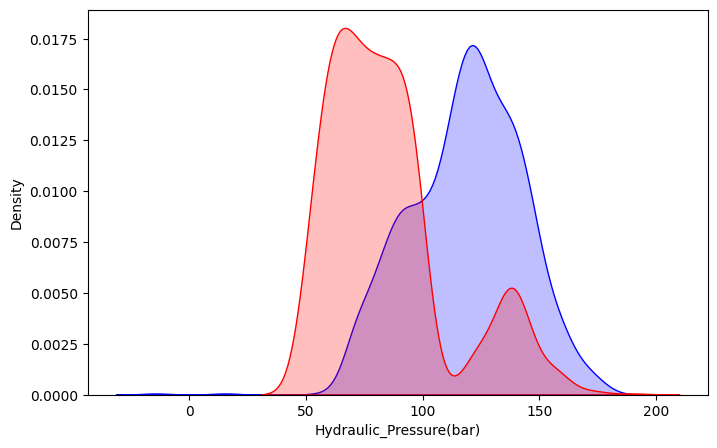

In [ ]:
# Data Visualization

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df3[df3["Downtime"] == 0]["Hydraulic_Pressure(bar)"], color='blue', fill=True)
sns.kdeplot(data=df3[df3["Downtime"] == 1]["Hydraulic_Pressure(bar)"], color='red', fill=True)



1    1265
0    1235
Name: Downtime, dtype: int64
 


<Axes: ylabel='Downtime'>

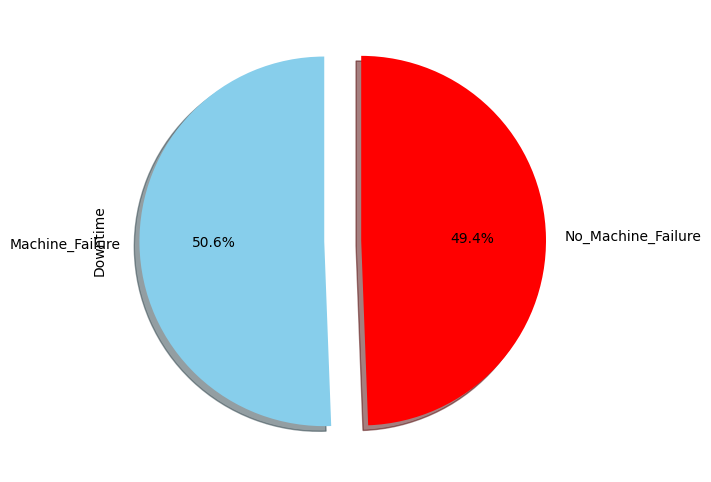

In [ ]:
print(df3.Downtime.value_counts())
print(" ")

df['Downtime'].value_counts().plot(kind='pie',
 figsize=(15,6),
 autopct="%1.1f%%",
 startangle=90,
 shadow=True,
 labels=['Machine_Failure','No_Machine_Failure'],
 colors=['skyblue','red'],
 explode=[0.1,0.1]
 )

<ipython-input-32-7300594c28b0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col])
<ipython-input-32-7300594c28b0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col])
<ipython-input-32-7300594c28b0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

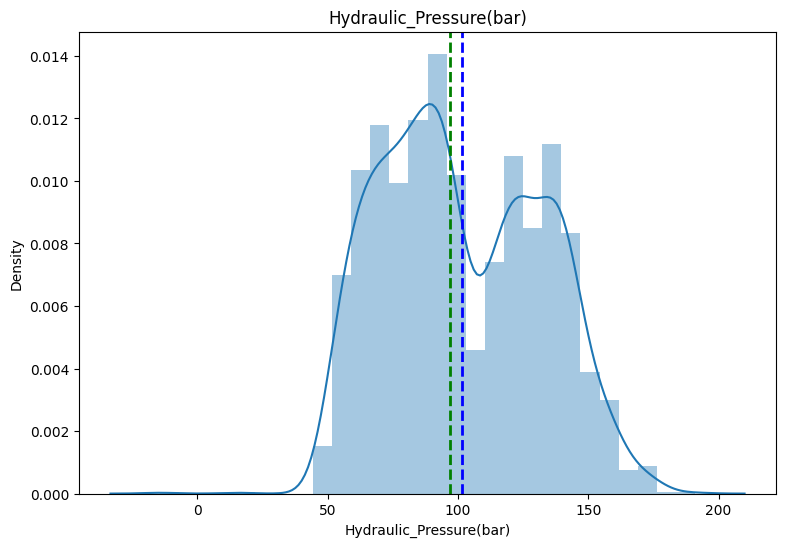

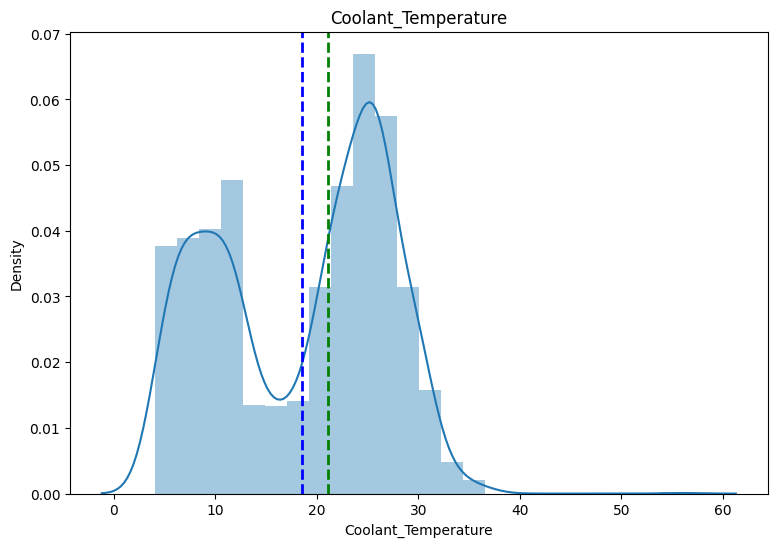

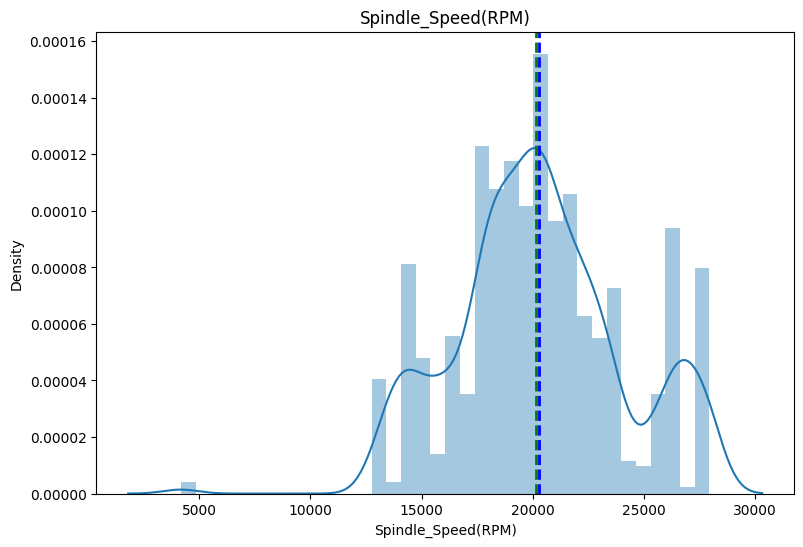

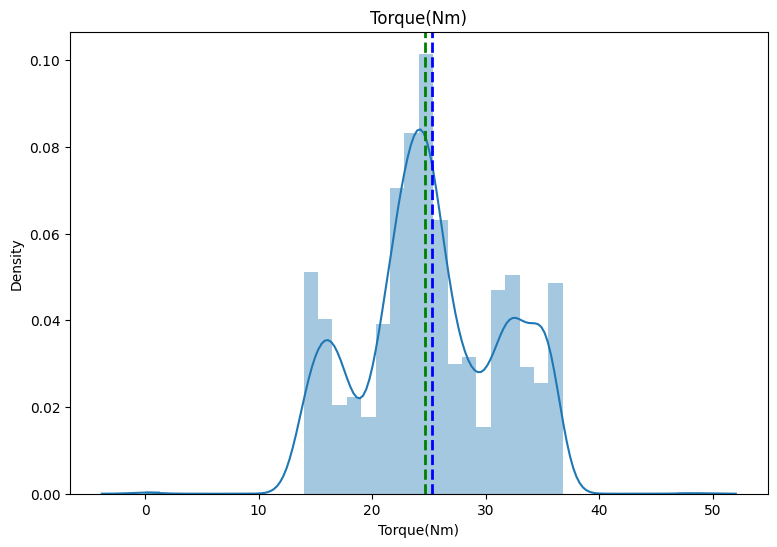

In [ ]:
for col in df3.loc[:,non_symmetric_feature]:
 fig=plt.figure(figsize=(9,6))
 ax=fig.gca()
 feature= (df3[col])
 sns.distplot(df3[col])
 ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
 ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
 ax.set_title(col)
plt.show()

<ipython-input-33-b0dab4685661>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col])
<ipython-input-33-b0dab4685661>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col])
<ipython-input-33-b0dab4685661>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seabo

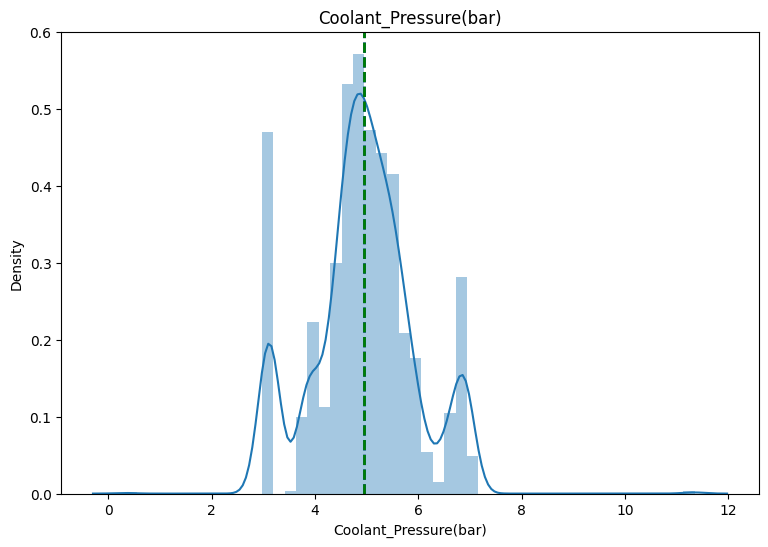

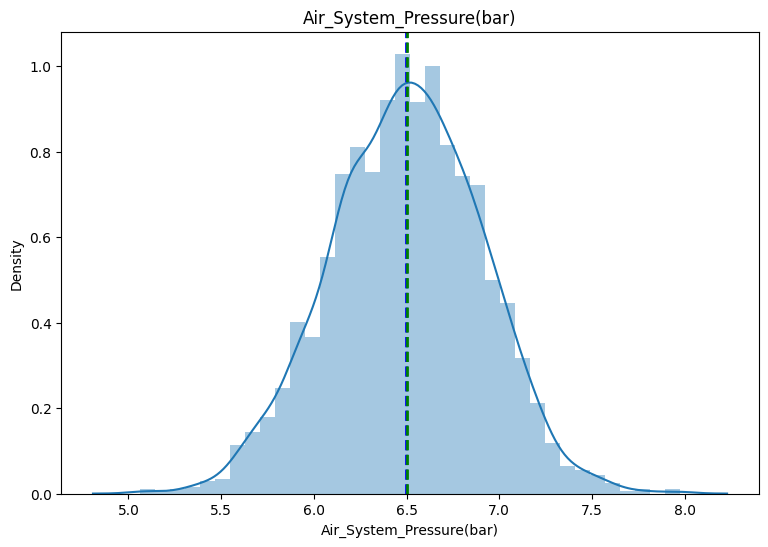

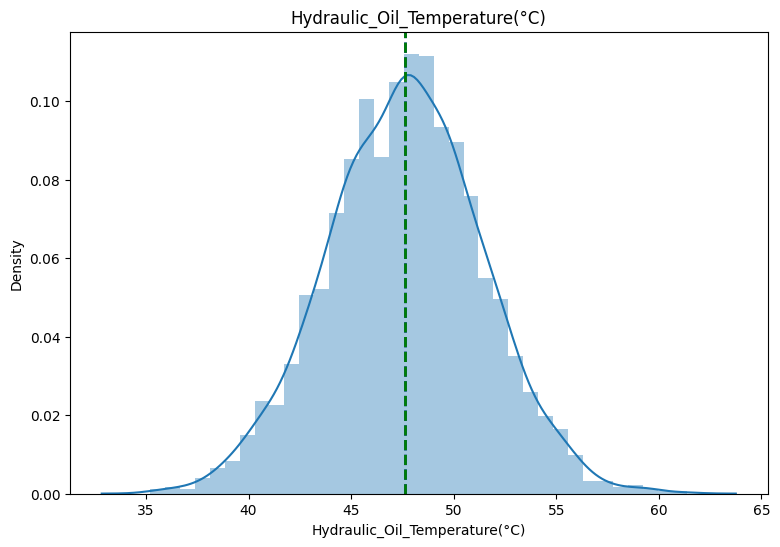

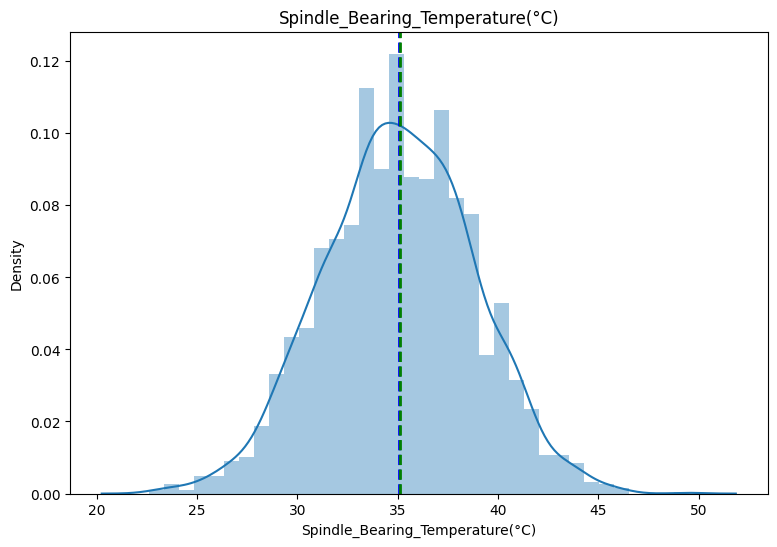

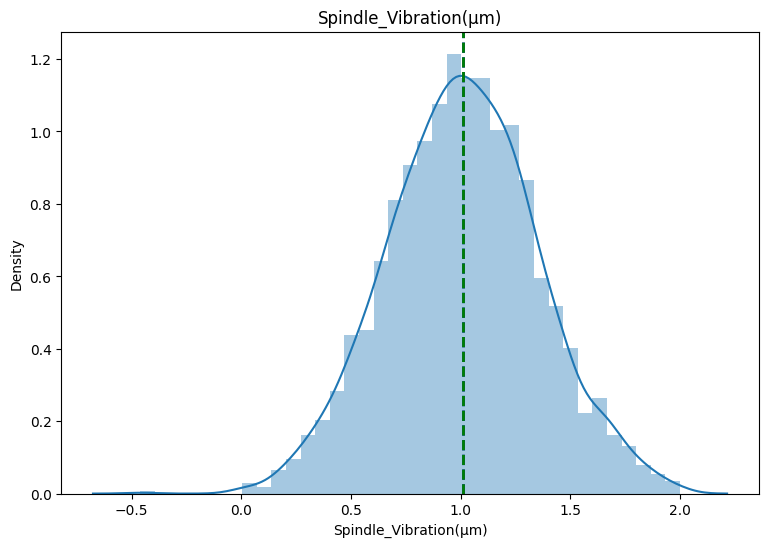

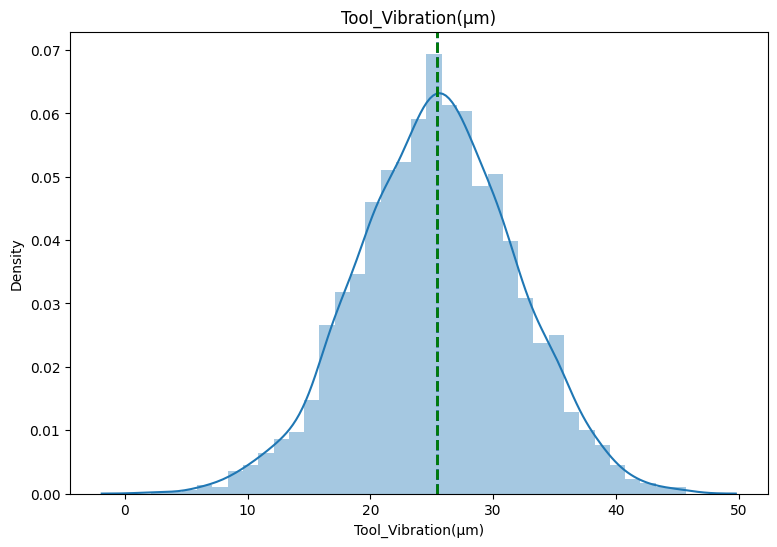

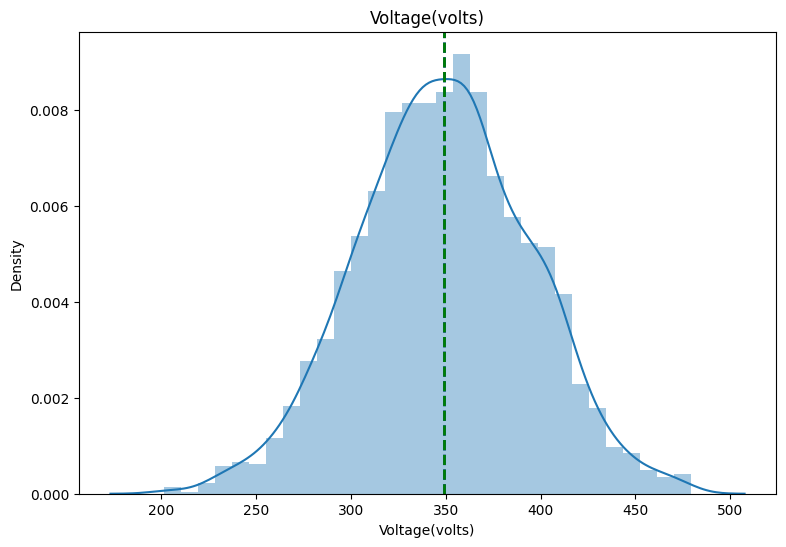

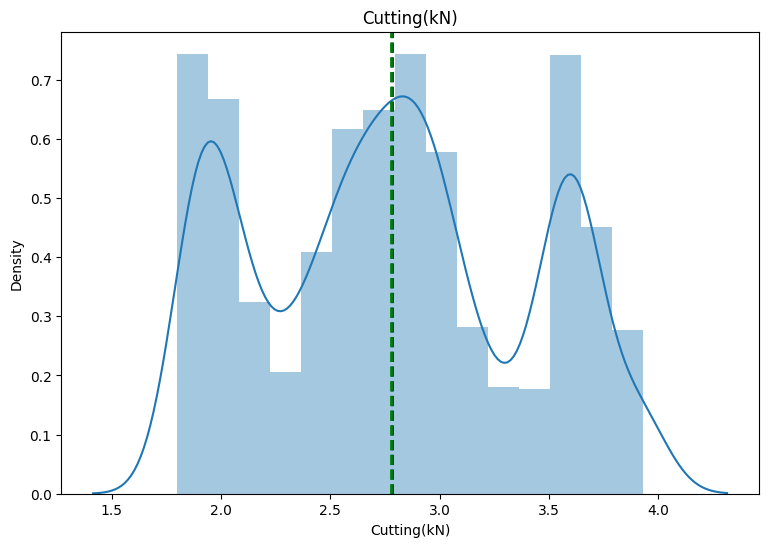

In [ ]:
for col in df3.loc[:,symmetric_feature]:
 fig=plt.figure(figsize=(9,6))
 ax=fig.gca()
 feature= (df3[col])
 sns.distplot(df3[col])
 ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
 ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
 ax.set_title(col)
plt.show()

Text(0, 0.5, 'Frequency')

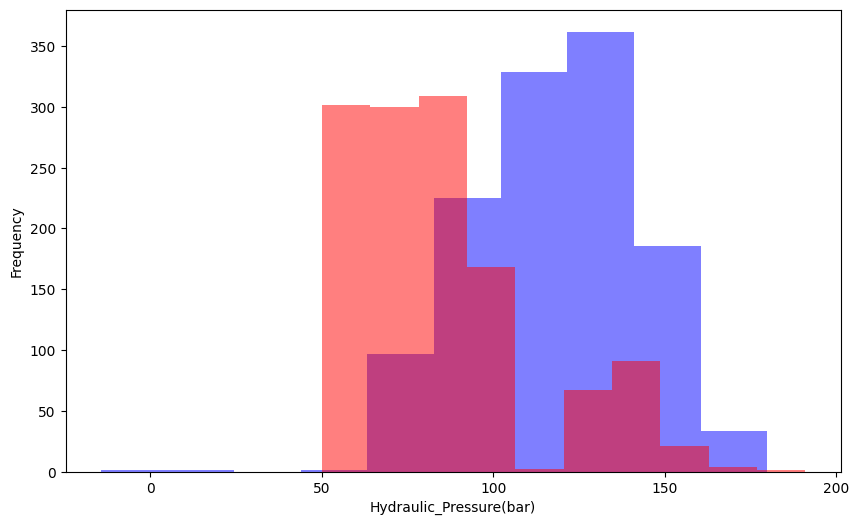

In [ ]:
column1 = 'Hydraulic_Pressure(bar)'
column2 = 'Downtime'

# Filter the data based on Downtime (0 or 1)
data_downtime_0 = df3[df3[column2] == 0]
data_downtime_1 = df3[df3[column2] == 1]

# Create histograms
plt.figure(figsize=(10, 6))
plt.hist(data_downtime_0[column1], alpha=0.5, color='blue', label=f'{column2} = 0')
plt.hist(data_downtime_1[column1], alpha=0.5, color='red', label=f'{column2} = 1')

# Add labels and a title
plt.xlabel(column1)
plt.ylabel("Downtime Frequency")

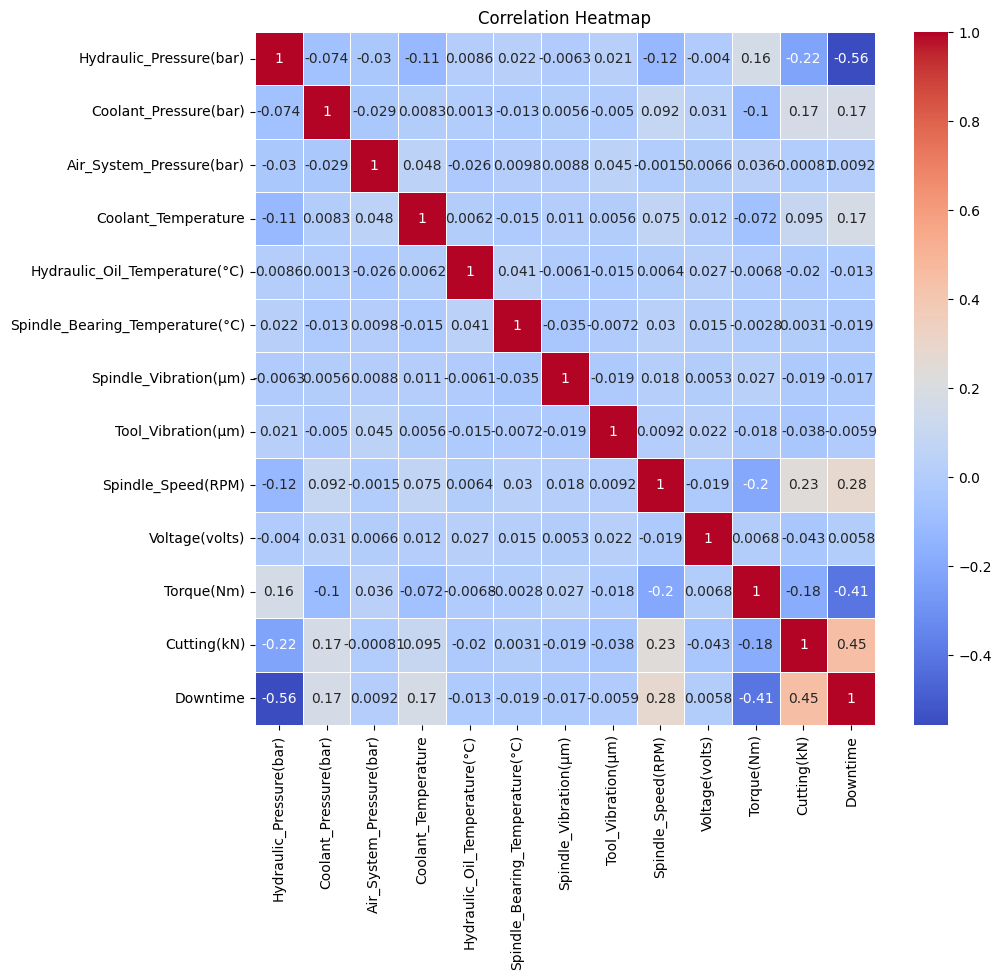

In [ ]:
# Correlation Heatmap to visualize the correlation between numeric variables
correlation_matrix = df3[['Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)','Downtime']].corr()
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df3.columns

Index(['Date', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime',
       'Machine_ID_Makino-L1-Unit1-2013', 'Machine_ID_Makino-L2-Unit1-2015',
       'Machine_ID_Makino-L3-Unit1-2015'],
      dtype='object')

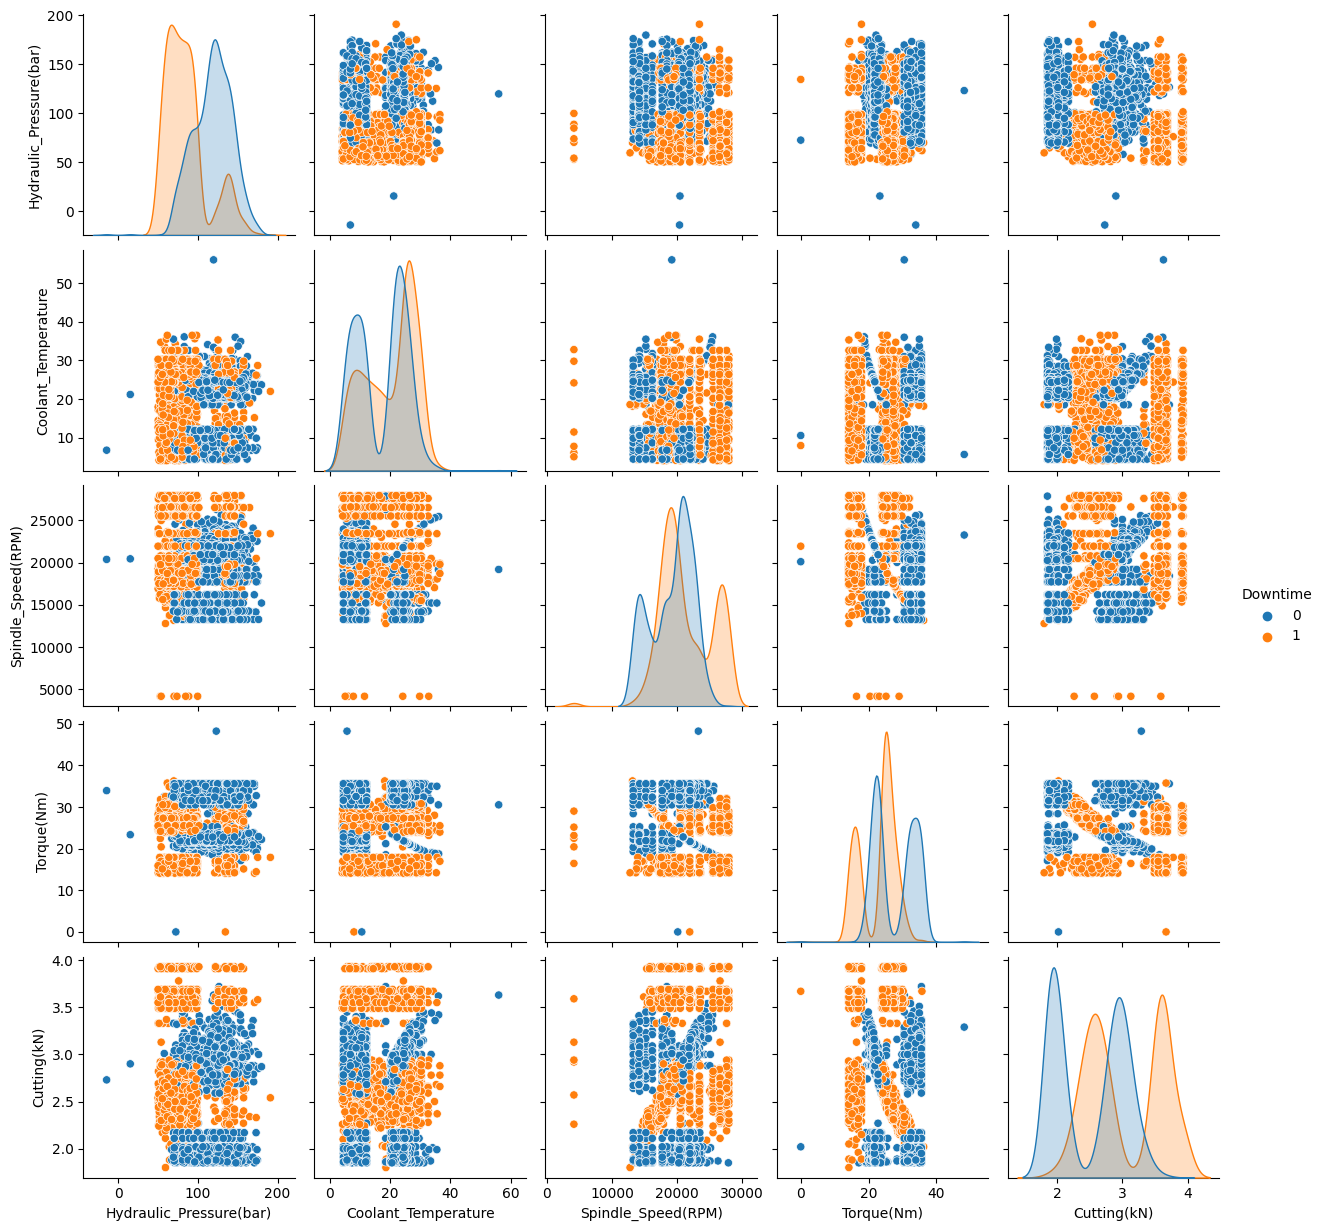

In [ ]:
# Pair Plot for multiple numeric variables
sns.pairplot(df3[['Hydraulic_Pressure(bar)', 'Coolant_Temperature', 'Spindle_Speed(RPM)','Torque(Nm)','Cutting(kN)','Downtime']], hue='Downtime')


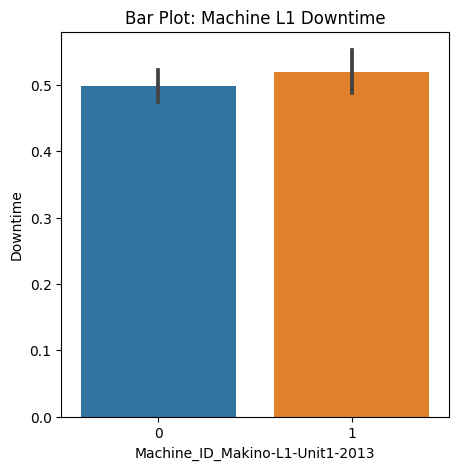

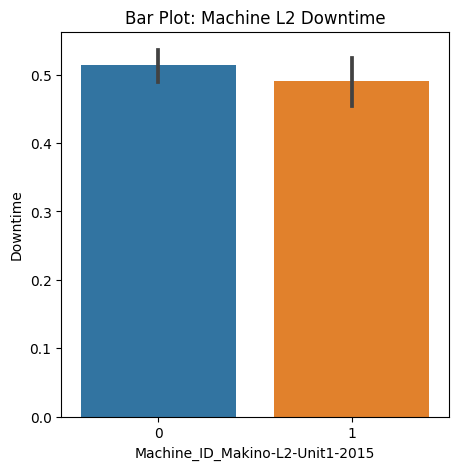

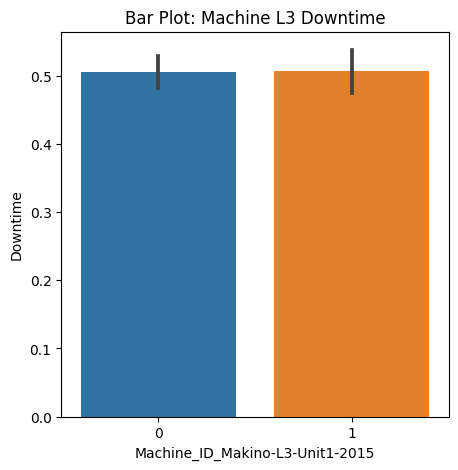

In [ ]:
# Analyzing Machine_IDs
plt.figure(figsize=(5, 5))
sns.barplot(x='Machine_ID_Makino-L1-Unit1-2013', y='Downtime', data=df3)
plt.title('Bar Plot: Machine L1 Downtime')
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x='Machine_ID_Makino-L2-Unit1-2015', y='Downtime', data=df3)
plt.title('Bar Plot: Machine L2 Downtime')
plt.show()

plt.figure(figsize=(5, 5))
sns.barplot(x='Machine_ID_Makino-L3-Unit1-2015', y='Downtime', data=df3)
plt.title('Bar Plot: Machine L3 Downtime')
plt.show()